# Exploratory Data Analysis

## Imports and Reading in Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
import matplotlib.image as mpimg
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
songs = pd.read_csv('../data/clean_data.csv', index_col = 0)
print(songs.shape)
songs.head(2)

(8716, 15)


Track                Artist  \
0         Shook Ones, Pt. II             Mobb Deep   
1  Hypnotize - 2014 Remaster  The Notorious B.I.G.   

                                               Genre  \
0  east coast hip hop, hardcore hip hop, hip hop,...   
1  east coast hip hop, gangster rap, hardcore hip...   

                                  Album Title Album Type Release Date  \
0                                The Infamous      album   1995-04-25   
1  Life After Death (2014 Remastered Edition)      album   1997-03-04   

                                           Thumbnail  Acousticness  \
0  https://i.scdn.co/image/ab67616d00004851a2203f...        0.0146   
1  https://i.scdn.co/image/ab67616d00004851fde79b...        0.1450   

   Danceability  Energy  Instrumentalness  Popularity  Speechiness  \
0         0.763   0.786            0.0114    0.787879        0.229   
1         0.901   0.697            0.0000    0.838384        0.280   

                 Track ID  Release Year  
0  33ZXjLCpiINn8eQIDYEPTD          1995  
1  7KwZNVEaqikRSBSpyhXK2j          1997

In [3]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8716 entries, 0 to 13128
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             8716 non-null   object 
 1   Artist            8716 non-null   object 
 2   Genre             8716 non-null   object 
 3   Album Title       8716 non-null   object 
 4   Album Type        8716 non-null   object 
 5   Release Date      8716 non-null   object 
 6   Thumbnail         8716 non-null   object 
 7   Acousticness      8716 non-null   float64
 8   Danceability      8716 non-null   float64
 9   Energy            8716 non-null   float64
 10  Instrumentalness  8716 non-null   float64
 11  Popularity        8716 non-null   float64
 12  Speechiness       8716 non-null   float64
 13  Track ID          8716 non-null   object 
 14  Release Year      8716 non-null   int64  
dtypes: float64(6), int64(1), object(8)
memory usage: 1.1+ MB


--- 
### Song Popularity
Below we will take a look at some of the most and least popular songs in the data.

In [4]:
#Here we will list the topp 15 most popular songs.
top_15_most_popular = songs.nlargest(15, 'Popularity')
print('Top 15 Most Popular Songs:')
print(top_15_most_popular[['Track', 'Artist', 'Popularity']])

Top 15 Most Popular Songs:
                                        Track              Artist  Popularity
10205                         Ella Baila Sola      Eslabon Armado    1.000000
10186                       Cupid - Twin Ver.         FIFTY FIFTY    0.989899
10187                                 Flowers         Miley Cyrus    0.979798
10203                                Daylight       David Kushner    0.979798
8252                               Classy 101                Feid    0.969697
8253                                     BESO             ROSALÍA    0.969697
8260                                      TQG             KAROL G    0.969697
10215  Creepin' (with The Weeknd & 21 Savage)        Metro Boomin    0.969697
10154        See You Again (feat. Kali Uchis)  Tyler, The Creator    0.959596
10178           Calm Down (with Selena Gomez)                Rema    0.959596
10191                          WHERE SHE GOES           Bad Bunny    0.959596
10207                      Boy's a Li

In [5]:
#Here we will list the 15 least popular songs.
top_15_least_popular = songs.nsmallest(15, 'Popularity')
print('Top 15 Least Popular Songs:')
print(top_15_least_popular[['Track', 'Artist', 'Popularity']])

Top 15 Least Popular Songs:
                   Track             Artist  Popularity
11              Party Up                DMX         0.0
16                  Work         Gang Starr         0.0
17          Feel Me Flow  Naughty By Nature         0.0
21         Passin' Me By       The Pharcyde         0.0
37               Push It        Salt-N-Pepa         0.0
40        Hip Hop Hooray  Naughty By Nature         0.0
44        Bring The Pain         Method Man         0.0
47  X Gon' Give It To Ya                DMX         0.0
52  Doo Wop (That Thing)    Ms. Lauryn Hill         0.0
54                 Shoop        Salt-N-Pepa         0.0
67                 O.P.P  Naughty By Nature         0.0
79   Got My Mind Made Up               2Pac         0.0
80    How Do You Want It               2Pac         0.0
81          Life Goes On               2Pac         0.0
82         Heartz Of Men               2Pac         0.0


Below we will take a look at the artist distribution in the dataset to see which are the most repeated artists in the dataset.

In [6]:
#First we will calculate the frequency of each artist
artist_count = songs['Artist'].value_counts()

In [7]:
#Next we will take the top X most frequent artists(I did not specify a number since this can vary by user of the code)
#In my case I will look at the top 25 first and adjust from there.
top_artists = artist_count.head(25) 

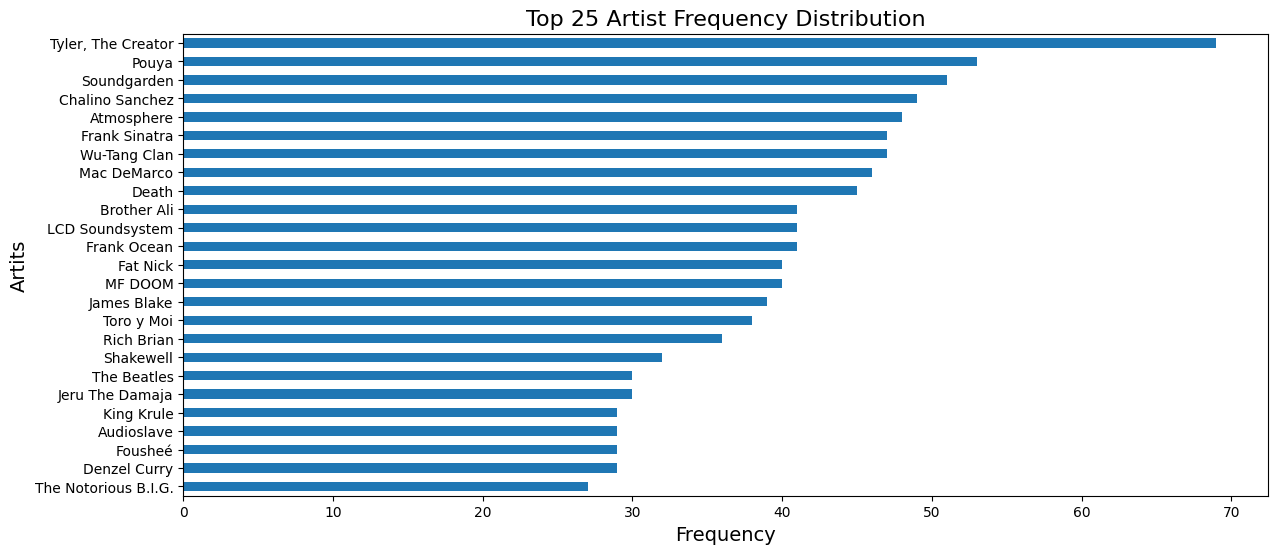

In [8]:
#Finally, we will plot the distribution of the top 25 artists.
top_artists = top_artists.sort_values(ascending = True) #We will look at this in ascending order
plt.figure(figsize = (14, 6))
top_artists.plot(kind = 'barh') #We are going to use a horizontal bar chart since it makes the 
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Artits', fontsize = 14)
plt.title('Top 25 Artist Frequency Distribution', fontsize = 16)
plt.savefig('../figures/Top_25.png');

In [9]:
#Additionally, we can look at the least frequent artists for comparison.
bottom_artists = artist_count.tail(25)

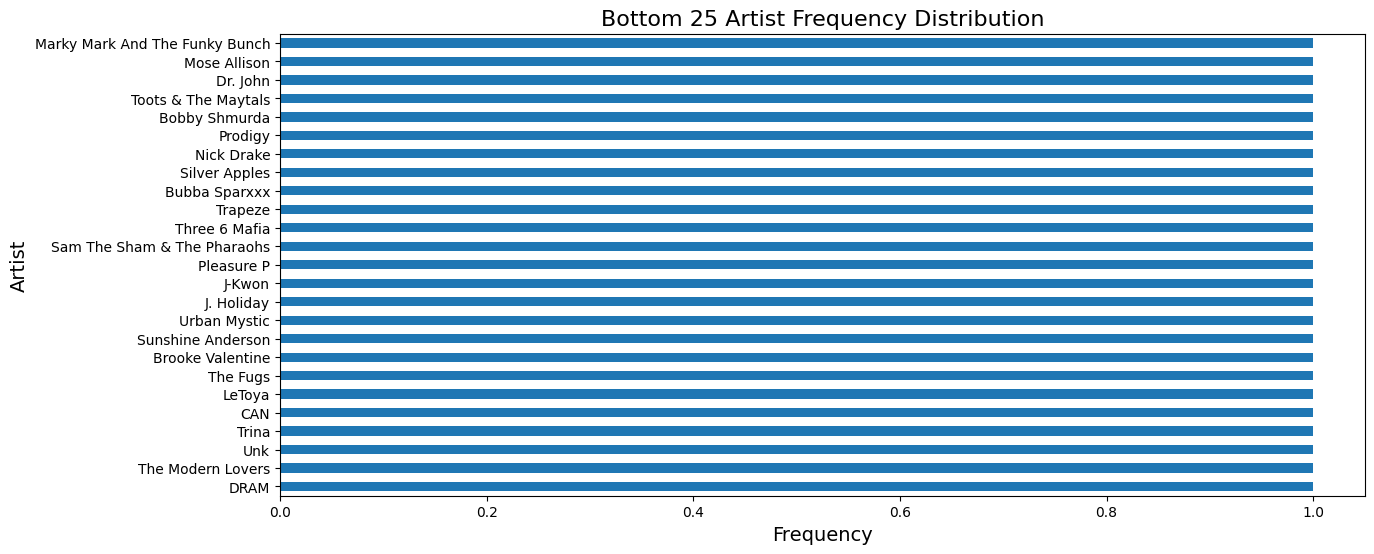

In [10]:
bottom_artists = bottom_artists.sort_values(ascending = True)
plt.figure(figsize = (14, 6))
bottom_artists.plot(kind = 'barh')
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Artist', fontsize = 14)
plt.title('Bottom 25 Artist Frequency Distribution', fontsize = 16)
plt.savefig('../figures/Bottom_25.png');

When we look at the top 25 artist we can see a differnce in distribution by artist throughout different levels of the chart. When we look at the bottom 25 we see that these are artists with a single instance in the dataset.

---
Below we will look at the Top 25 and Bottom 25 artists by Popularity.

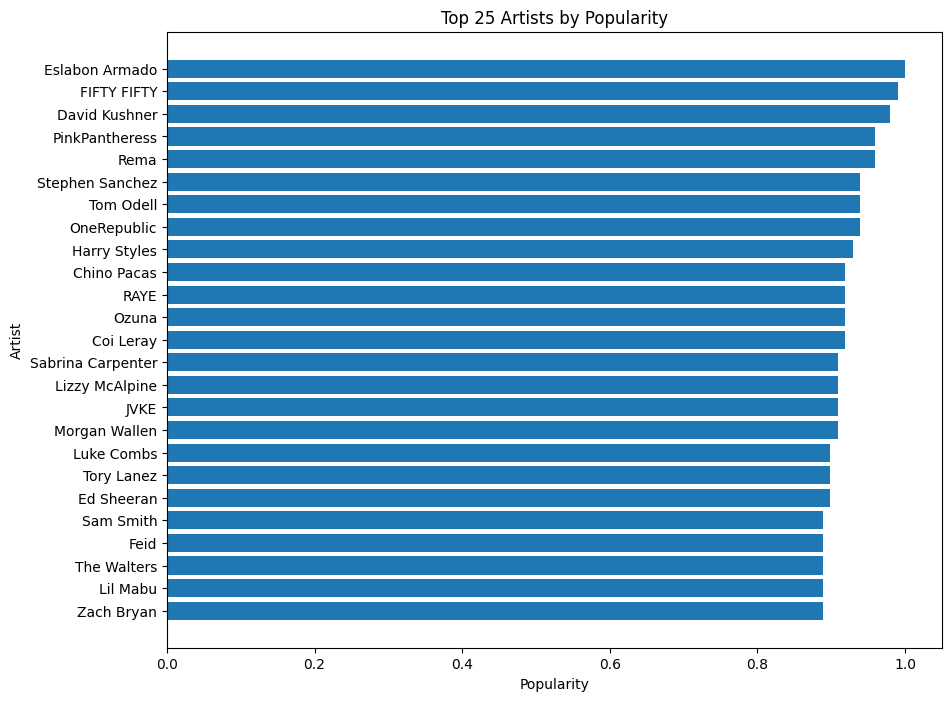

In [11]:
top_popular_artists = songs.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head(25)

plt.figure(figsize=(10, 8))
plt.barh(top_popular_artists.index, top_popular_artists.values)
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.title('Top 25 Artists by Popularity')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest popularity at the top
plt.savefig('../figures/Top_Popular_25.png');

Above we can see the top 25 most popular artist.

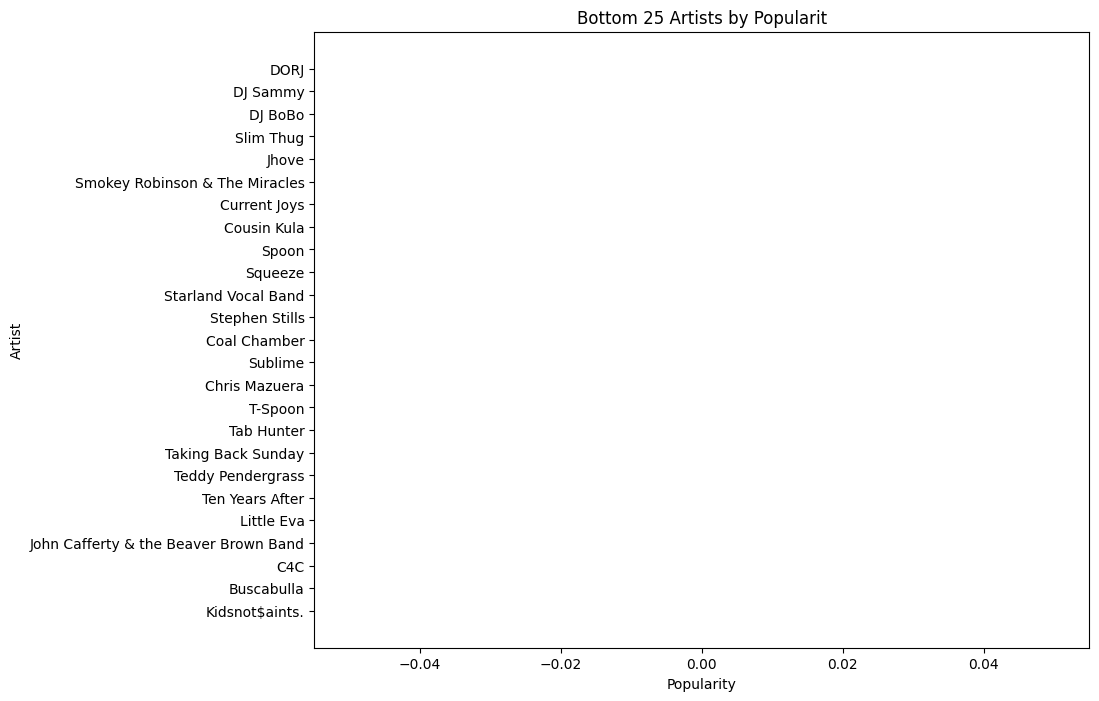

In [12]:
least_popular_artists = songs.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).tail(25)

plt.figure(figsize=(10, 8))
plt.barh(least_popular_artists.index, least_popular_artists.values)
plt.xlabel('Popularity')
plt.ylabel('Artist')
plt.title('Bottom 25 Artists by Popularit')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest popularity at the top
plt.savefig('../figures/Bottom_Popular_25.png');

Above we can see that these are the artists with zero popularity. This image will not be used for the presentation.

---
## WordCloud
Below I will use WordCloud to look at some features like top artists by genry...

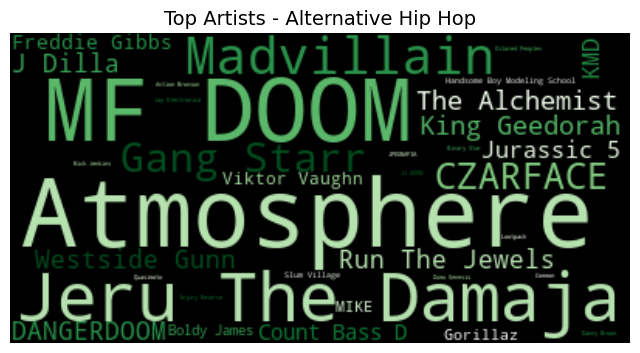

In [13]:
# Filter the songs dataframe by genre 'alternative hip hop'
filtered_songs = songs[songs['Genre'].str.contains('alternative hip hop')]

# Group by 'Artist' and count the occurrences
artist_counts = filtered_songs['Artist'].value_counts()

# Select the top 50 artists
top_artists = artist_counts.head(50)

# Generate a word cloud for the top artists
wordcloud = WordCloud(background_color='Black', colormap = 'Greens').generate_from_frequencies(top_artists)

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top Artists - Alternative Hip Hop', fontsize=14)
plt.axis('off')
plt.savefig('../figures/Top_Alt_HH_Artists.png')

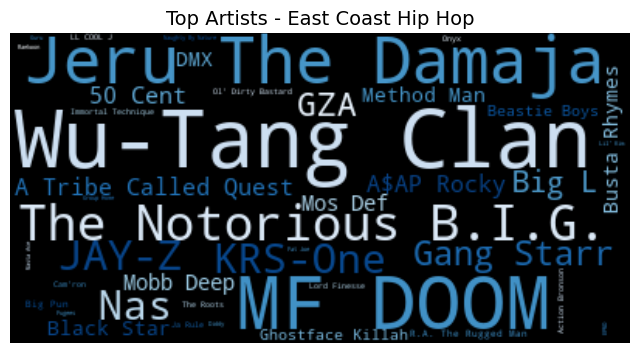

In [14]:
# Filter the songs dataframe by genre 'alternative hip hop'
filtered_songs = songs[songs['Genre'].str.contains('east coast hip hop')]

# Group by 'Artist' and count the occurrences
artist_counts = filtered_songs['Artist'].value_counts()

# Select the top 50 artists
top_artists = artist_counts.head(50)

# Generate a word cloud for the top artists
wordcloud = WordCloud(background_color='Black', colormap = 'Blues').generate_from_frequencies(top_artists)

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top Artists - East Coast Hip Hop', fontsize=14)
plt.axis('off')
plt.savefig('../figures/EastCoast_HH_Artists.png')

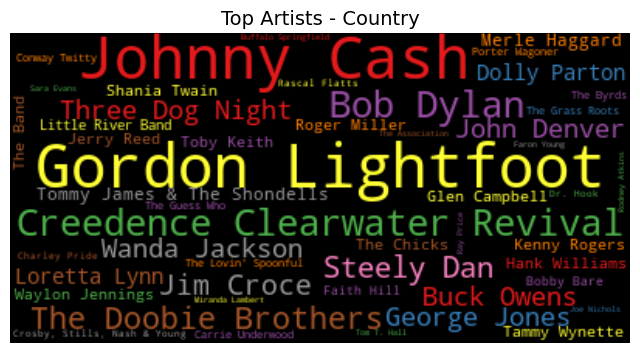

In [15]:
# Filter the songs dataframe by genre 'alternative hip hop'
filtered_songs = songs[songs['Genre'].str.contains('country')]

# Group by 'Artist' and count the occurrences
artist_counts = filtered_songs['Artist'].value_counts()

# Select the top 50 artists
top_artists = artist_counts.head(50)

# Generate a word cloud for the top artists
wordcloud = WordCloud(background_color='Black', colormap = 'Set1_r').generate_from_frequencies(top_artists)

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top Artists - Country', fontsize=14)
plt.axis('off')
plt.savefig('../figures/Top_Country_Artists.png')

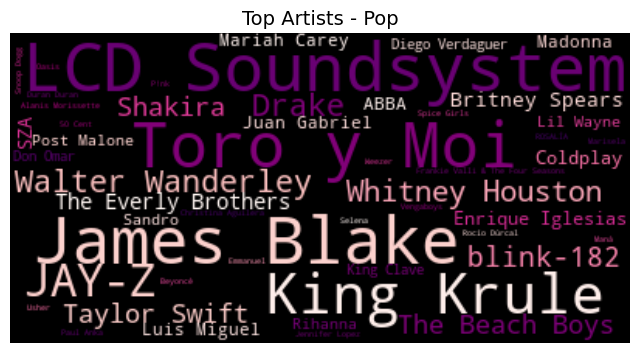

In [16]:
#Setting the dpi value to increase image clarity
dpi = 500

# Filter the songs dataframe by genre 'alternative hip hop'
filtered_songs = songs[songs['Genre'].str.contains('pop')]

# Group by 'Artist' and count the occurrences
artist_counts = filtered_songs['Artist'].value_counts()

# Select the top 50 artists
top_artists = artist_counts.head(50)

# Generate a word cloud for the top artists
wordcloud = WordCloud(background_color='black', colormap = 'RdPu').generate_from_frequencies(top_artists)

# Plot the word cloud
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top Artists - Pop', fontsize=14)
plt.axis('off')
plt.savefig('../figures/Top_Pop_Artists.png')

---
## Realease Year Analysis
Below we will look at the Release Year data and how the quantity of songs might vary starting from the older to the most recent year.

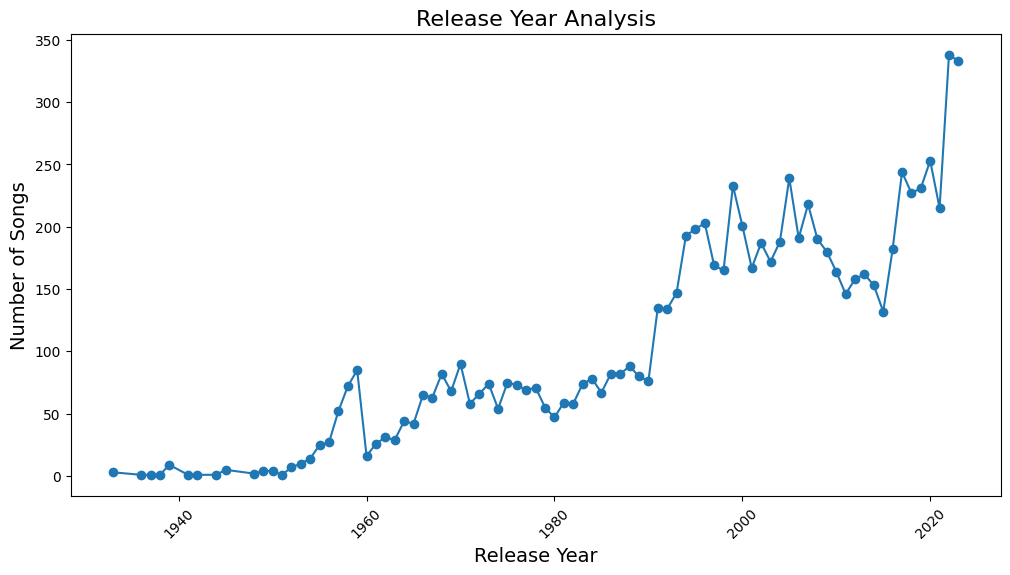

In [17]:
# Calculate the count of songs for each release year
release_year_counts = songs['Release Year'].value_counts().sort_index()

# Plot the release year analysis using a line chart
plt.figure(figsize=(12, 6))
release_year_counts.plot(kind='line', marker='o')
plt.xlabel('Release Year', fontsize = 14)
plt.ylabel('Number of Songs', fontsize = 14)
plt.title('Release Year Analysis', fontsize = 16)
plt.xticks(rotation=45)
plt.savefig('../figures/Release_Year_Analysis.png')

In [18]:
# Find the oldest release year
oldest_year = songs['Release Year'].min()

# Find the oldest release date
oldest_date = songs['Release Date'].min()

print("Oldest Release Year:", oldest_year)
print("Oldest Release Date:", oldest_date)

Oldest Release Year: 1933
Oldest Release Date: 1933-01-01


In [19]:
# Find the oldest release year
newest_year = songs['Release Year'].max()

# Find the oldest release date
newest_date = songs['Release Date'].max()

print("Newest Release Year:", newest_year)
print("Newest Release Date:", newest_date)

Newest Release Year: 2023
Newest Release Date: 2023-06-02


**Interpretation:** Our data dates as far back as January 1st, 1933 and goes as recent as June 2nd, 2023. As we can see in the graph, as the years went by the release in music has increased drastically. Even for just 6 moths of 2023 we can see that the release numbers are close to the previous point which means that the music release rate is constantly increasing.

---
### Feature Distribution
Below we will look at some of the feature distributions.

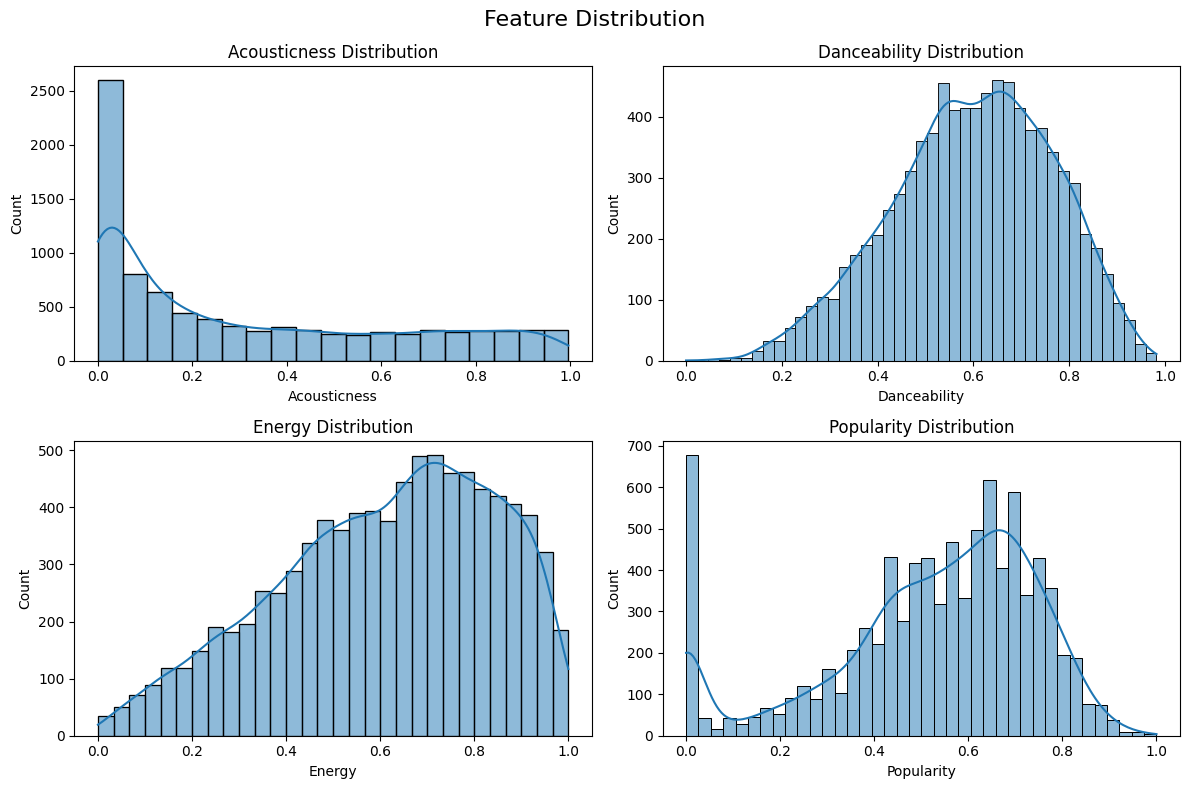

In [20]:
#Creating a subplot for multiple charts
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))

#We will plot histograms, in the KDE style
sns.histplot(data=songs, x='Acousticness', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Acousticness Distribution', fontsize = 12)

sns.histplot(data=songs, x='Danceability', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Danceability Distribution', fontsize = 12)

sns.histplot(data=songs, x='Energy', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Energy Distribution', fontsize = 12)

sns.histplot(data=songs, x='Popularity', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Popularity Distribution', fontsize = 12)

#Adding a title
plt.suptitle('Feature Distribution', fontsize = 16)

# Adjust spacing between subplots
plt.tight_layout()
fig.savefig('../figures/feature_dist.png')

In the iamge above we can see how the repetition of the feature. The Count on the y-axis represents the number of times each value of X has repeated in the dataset.

---
Here we will look at the correlation analysis for the numeric features like acousticness, danceability, energy, etc.

In [21]:
# Select the numerical features for correlation analysis
numerical_features = ['Acousticness', 'Danceability', 'Energy', 'Popularity', 'Speechiness', 'Instrumentalness']

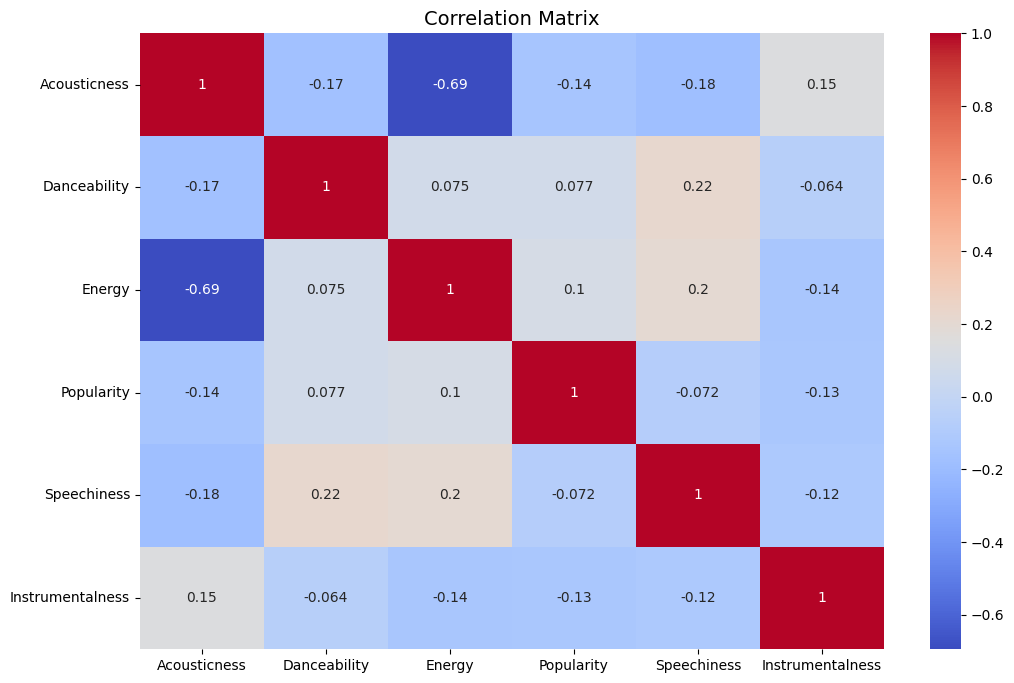

In [22]:
#Here we are going to create a correlation matrix to see how each numeric feature correlates with one another

correlation_matrix = songs[numerical_features].corr()

#We will be using a heatmap to look at the matix
plt.figure(figsize = (12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix', fontsize = 14);

**Interpretation:** Here we can see the correlation between each of the features. We can see that Acousticness has a weak correlations with Energy and Popularity, Danceability has a weak correlation with Speechiness which I can agree with since dance music is often upbeat in tempo with very little to no lyrics. Overall, I think that the correlation between features does not affect the song in any other feature.

---
## Genre Analysis

Spotify provides a string with multiple genres and sorting them out by song into individual genres would take a long time. For example if we look at the song 'That's That', by MF DOOM and we look at the Genre column we get the following: 
- Genre: 'alternative hip hop, east coast hip hop, hip hop, instrumental hip hop', there are four different categories for one song. After doing additional research I found that spotify takes a 'subjective' approach when calssifying genre.
  - Additionally, if we look at the song 'Anti-Hero' by Taylor Swift the Genre column only contains 'pop' as the entry. There are different size strings provided so it makes it difficult to look through the data to have a clearer understanding of the genre. In an ideal situation the Genre of the sound would be just one entry rather than multiple which would make it easier to classify and analyze.
- Below I will provide a count of the genres so we can see how many different genres there are in this dataset.


*NOTE: I tried using NetworkX to see if I could narrow down the word combinations for the genres but it proved to be more difficult than I expected. I have kept the code in a separate notebook for future analysis and improvements, it will be included with the final project once perfected.*

In [12]:
#Here we will attempt to look at the genres to see which is the most popular.
#We will begin by creating a list to store all the genres
genres = []

#We will iterate over each row in the 'Genre' column
for i in songs['Genre']:
    genres_list = i.split(',') #Here we are splitting the genres into separates genres
    genres_list = [i.strip() for i in genres_list]
    genres.extend(genres_list) #Here we are adding the genres to the list
    
#Here we will convert the list into a pd series
genres_series = pd.Series(genres)

#Here we will count all the repetitions of each diferent genre
genres_counts = genres_series.value_counts()

#Finally we will print out the top 15 genres
print(genres_counts.head(15))

rock                   1191
hip hop                 858
classic rock            770
rap                     682
soft rock               594
hard rock               584
mellow gold             538
album rock              523
alternative metal       438
east coast hip hop      423
singer-songwriter       421
alternative rock        418
soul                    417
alternative hip hop     384
folk rock               371
dtype: int64


For the code above I used this as inspiration to be able to split the genres in order to better take a look at the most popular ones. Here is the [link](https://towardsdatascience.com/genre-classification-with-python-and-spotifys-api-58c633150be7) to the 'Towards Data Science' article.

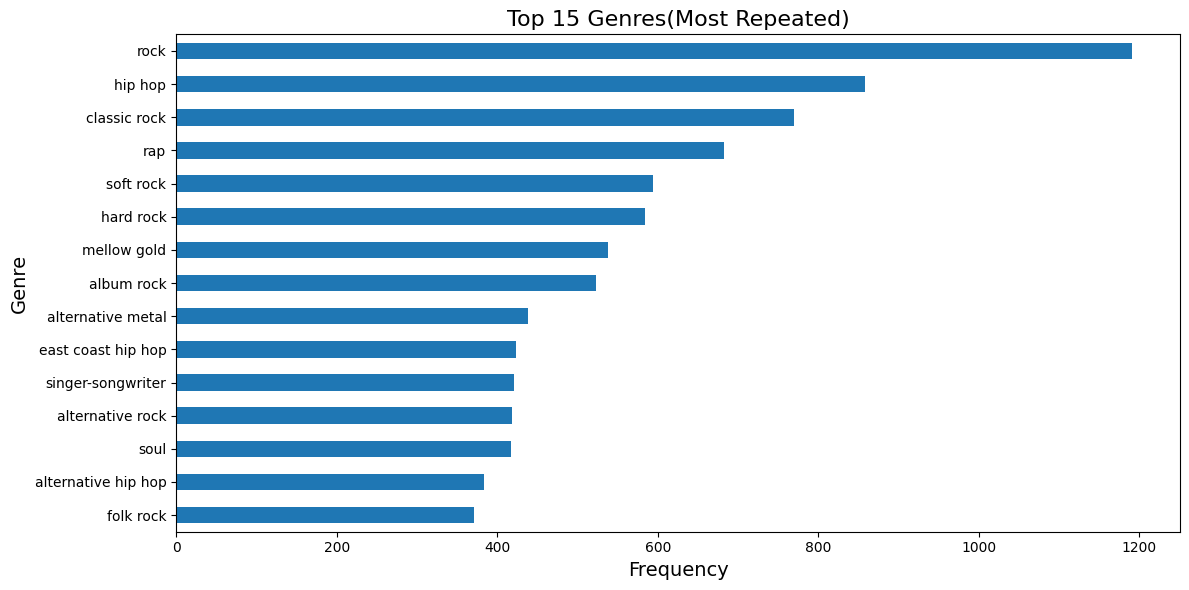

In [13]:
#Selecting the top 15 genres
top_genres = genres_counts.head(15)

#We will be plotting a horizontal bar chart
plt.figure(figsize=(12, 6))
top_genres.sort_values().plot(kind = 'barh')
plt.title('Top 15 Genres(Most Repeated)', fontsize = 16)
plt.xlabel('Frequency', fontsize = 14)
plt.ylabel('Genre', fontsize = 14)
plt.tight_layout()
plt.savefig('../figures/Top_15_Genres.png')

In [15]:
#Here we will be looking at the top 15 genres by popularity.
#Since Spotify provides a list of genres for each song that is why we see multiple entries for Genre
top_genres_popularity = songs.groupby('Genre')['Popularity'].sum().nlargest(15)
print(top_genres_popularity)

Genre
hip hop, rap                                                                            49.595960
lo-fi cover                                                                             46.494949
dance pop, pop                                                                          45.595960
east coast hip hop, gangster rap, hardcore hip hop, hip hop, rap                        41.171717
lgbtq+ hip hop, neo soul                                                                29.242424
edmonton indie, lo-fi indie, pov: indie                                                 28.636364
banda, corrido, corridos clasicos, musica mexicana, norteno, sierreno                   26.989899
rock-and-roll, rockabilly                                                               25.404040
contemporary country, country, country road                                             24.696970
alternative metal, alternative rock, classic rock, grunge, hard rock, nu metal, rock    22.979798
alternative hi

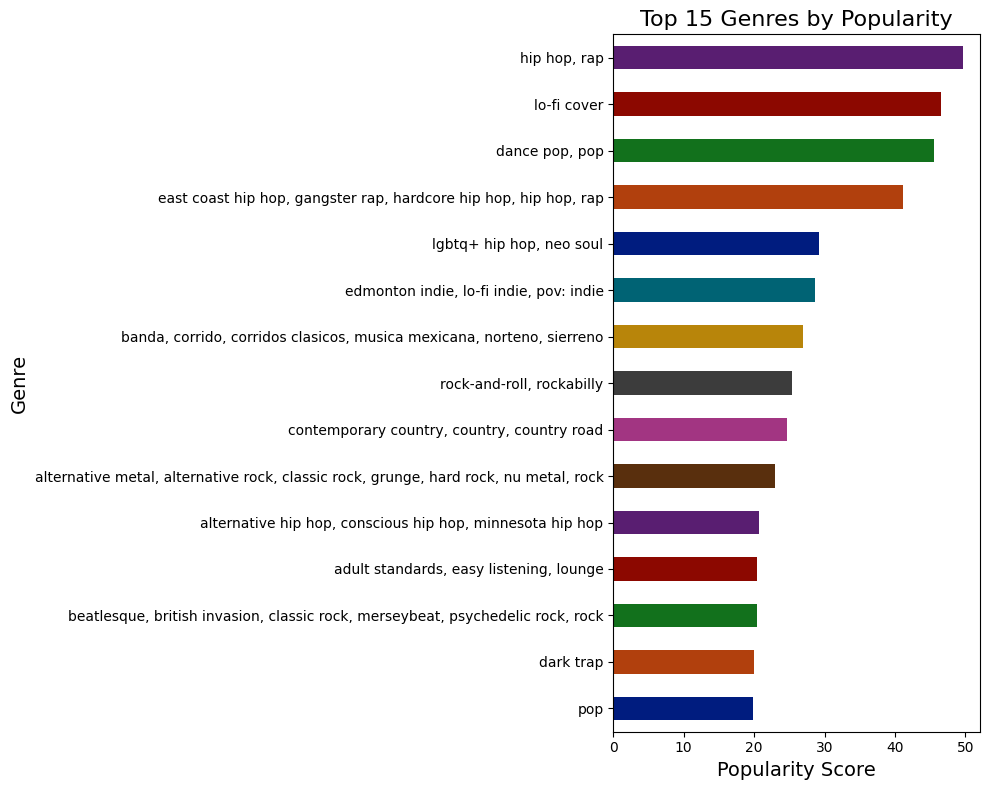

In [20]:
# Create the horizontal bar chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette('dark')  # Set the colors for the bars
top_genres_popularity.sort_values().plot(kind='barh', color=colors)

# Customize the plot
plt.title('Top 15 Genres by Popularity', fontsize = 16)
plt.xlabel('Popularity Score',fontsize = 14)
plt.ylabel('Genre', fontsize = 14)
plt.tight_layout()
#Saving the image
plt.savefig('../figures/Top_15_Genres_Popularity.png')

In [23]:
genres = songs['Genre'].value_counts().unique().sum()
print(f"There are a total of {genres} in this dataset without splitting each part of the string.")

There are a total of 1594 in this dataset without splitting each part of the string.


In [24]:
genre_lists = songs['Genre'].str.split(',').tolist()
genres_stripped = songs['Genre'].str.strip().str.lower().unique()
print(f"There are a total of {len(genres_stripped)} unique genres when we split the genre column per entry.")

There are a total of 2522 unique genres when we split the genre column per entry.


**Interpretation:** As we can see above, there are a total of 1594 unique entries in the Genre column(*these are in string format*). Once we split the string at the ',' we have a total of 2522 different genre classifications. Looking back at what was mentioned before some songs have multiple combinations of genres which would mean that the same song could be classified for multiple genres based on the data spotify provides.

---
## Top Albums
Below we will look at the top albums using matplotlib's image function along with urllib requests and PIL image.

The image below displays the top 20 albums in the dataset with the largest Popularity value.

In [25]:
#Here we will select the top 20 albums based on the Popularity
top_albums = songs.nlargest(20, 'Popularity')

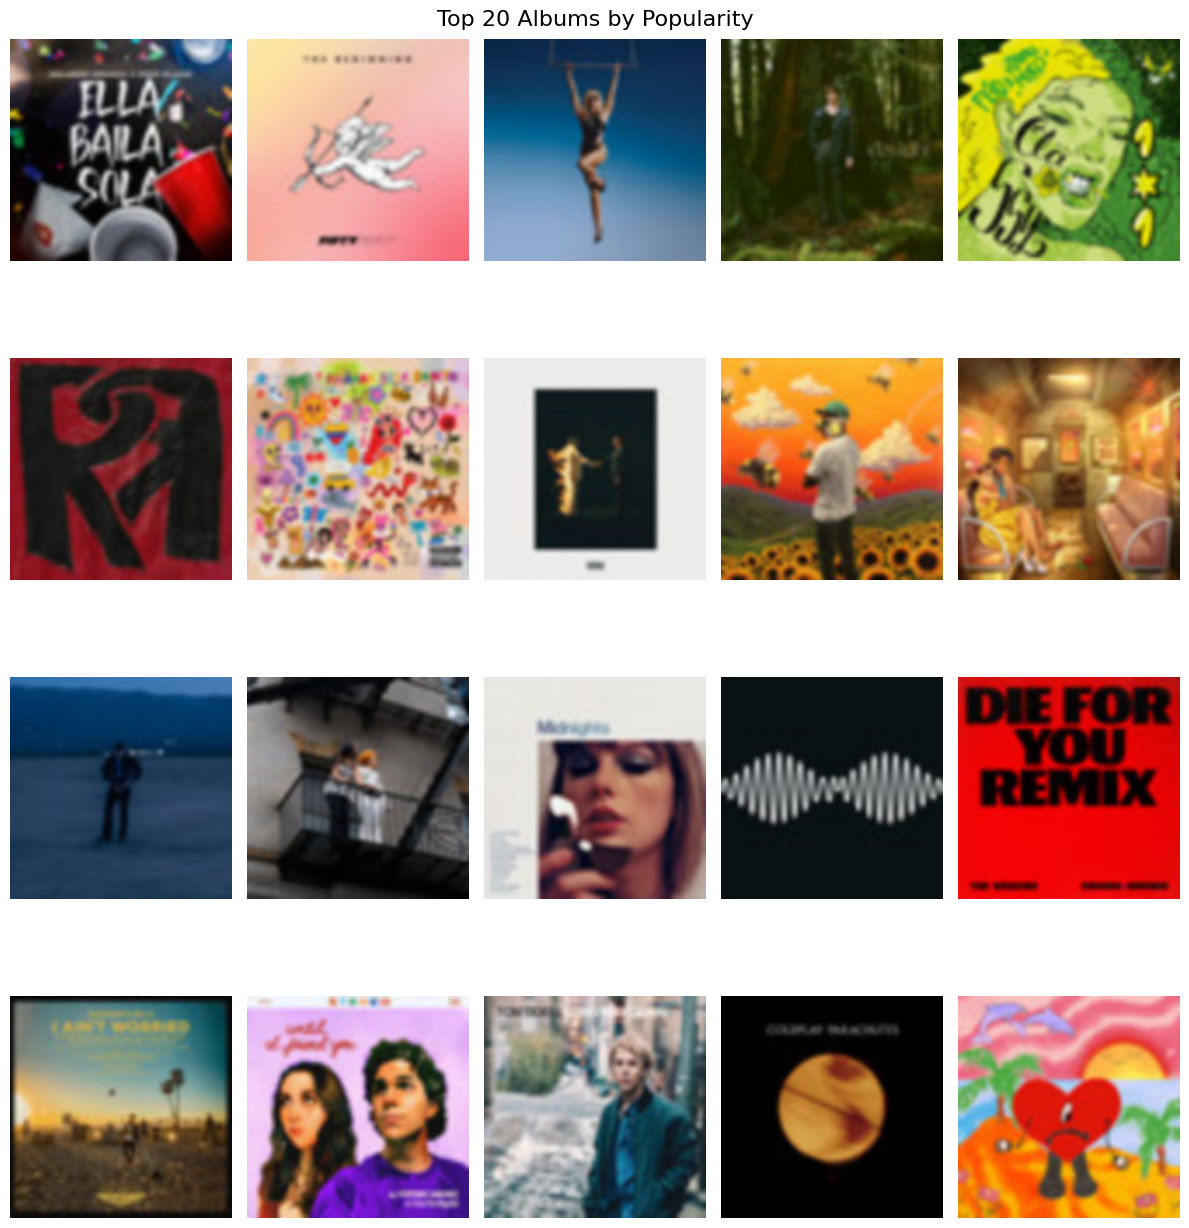

In [26]:
# Set up the grid for thumbnail images
num_rows = 4
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 14))

# Iterate over the top albums and plot the thumbnails
for i, (index, album) in enumerate(top_albums.iterrows()):
    row = i // num_cols
    col = i % num_cols
    img_url = album['Thumbnail']
    img_data = urllib.request.urlopen(img_url)
    img = Image.open(img_data)
    axes[row, col].imshow(np.array(img), interpolation = 'bicubic') #by setting the interpolation to bicubic it helps make the image clearer
    axes[row, col].axis('off')
    
plt.suptitle('Top 20 Albums by Popularity', fontsize = 16, y = 0.93)
plt.tight_layout()
plt.savefig('../figures/Top_20_Albums.png')

---
Below we will look at the top 20 albums for 'Alternative Hip Hop'.

In [27]:
#We will begin by filtering the songs with 'alternative hip hop' in the Genre column
filtered_songs = songs[songs['Genre'].str.contains('alternative hip hop', case = False)]

In [28]:
#Here we will pick the top 20 from the filtered_songs dataframe.
top_ahh = filtered_songs.nlargest(20, 'Popularity')

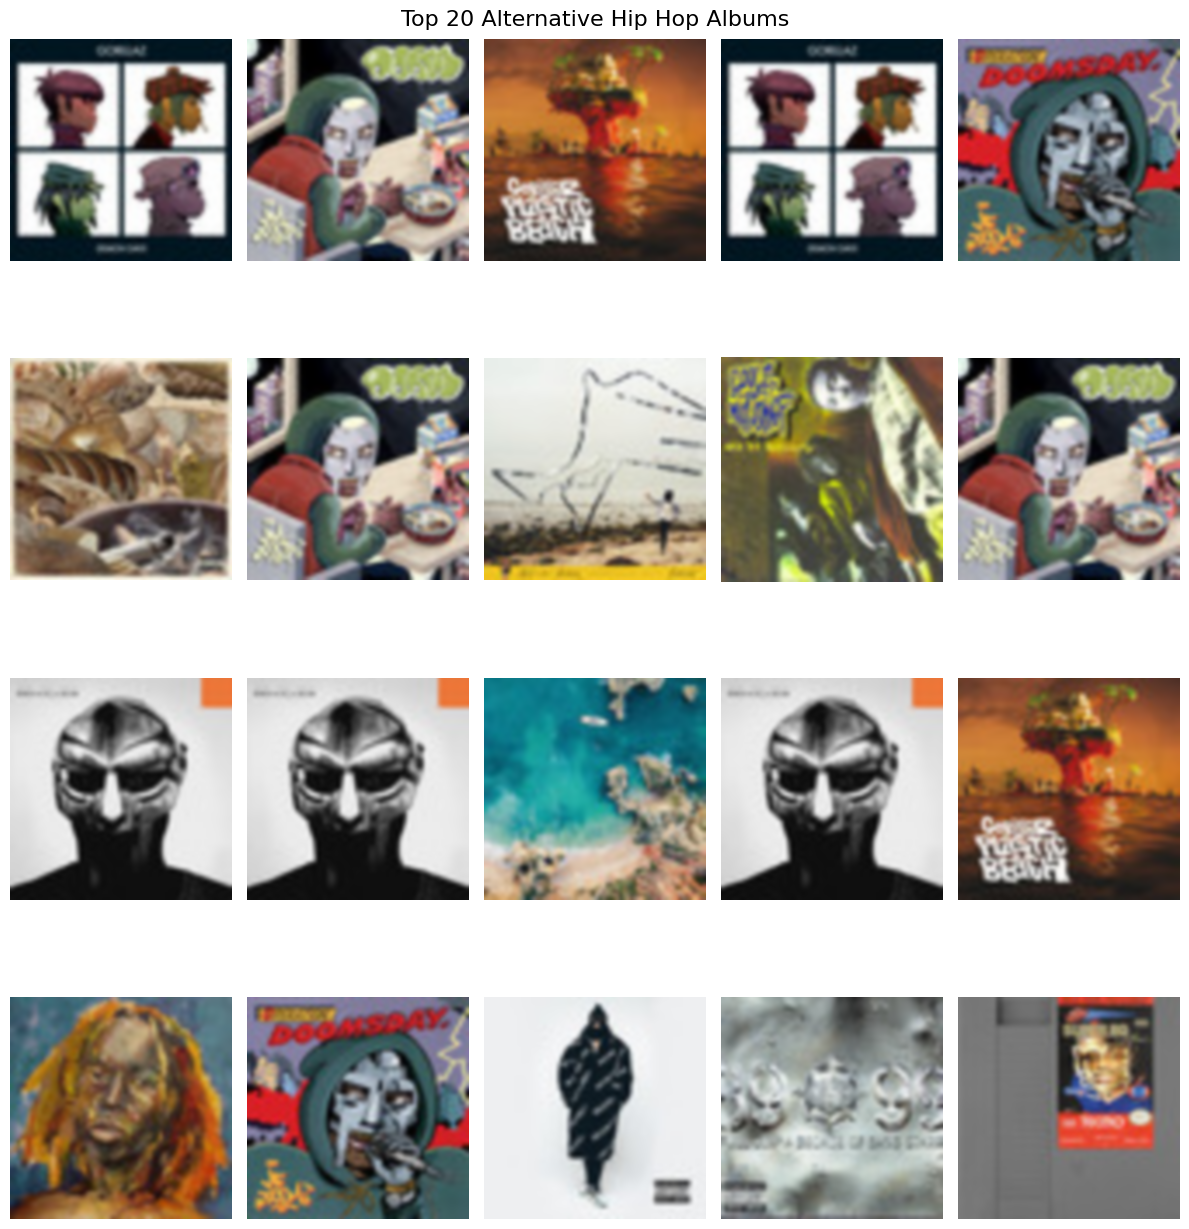

In [29]:
#Lastly, here we will set up the code for the image, the code should be the same at the one above except we are substituting top_albums for top_ahh
# Set up the grid for thumbnail images
num_rows = 4
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 14))

# Iterate over the top albums and plot the thumbnails
for i, (index, album) in enumerate(top_ahh.iterrows()):
    row = i // num_cols
    col = i % num_cols
    img_url = album['Thumbnail']
    img_data = urllib.request.urlopen(img_url)
    img = Image.open(img_data)
    axes[row, col].imshow(np.array(img), interpolation='bicubic')  # Set interpolation to 'bicubic'
    axes[row, col].axis('off')
    
#Here we will set up the title, the tight layout of the image, and save the image into our figures album
plt.suptitle('Top 20 Alternative Hip Hop Albums', fontsize = 16, y = 0.93)
plt.tight_layout()
plt.savefig('../figures/Top_20_AHH.png')

---
Below we will look at the top Black Metal Albums

In [30]:
#We will begin by filtering the songs with 'alternative hip hop' in the Genre column
filtered_songs = songs[songs['Genre'].str.contains('black metal', case = False)]

In [31]:
#Here we will pick the top 20 from the filtered_songs dataframe.
top_bmetal = filtered_songs.nlargest(20, 'Popularity')

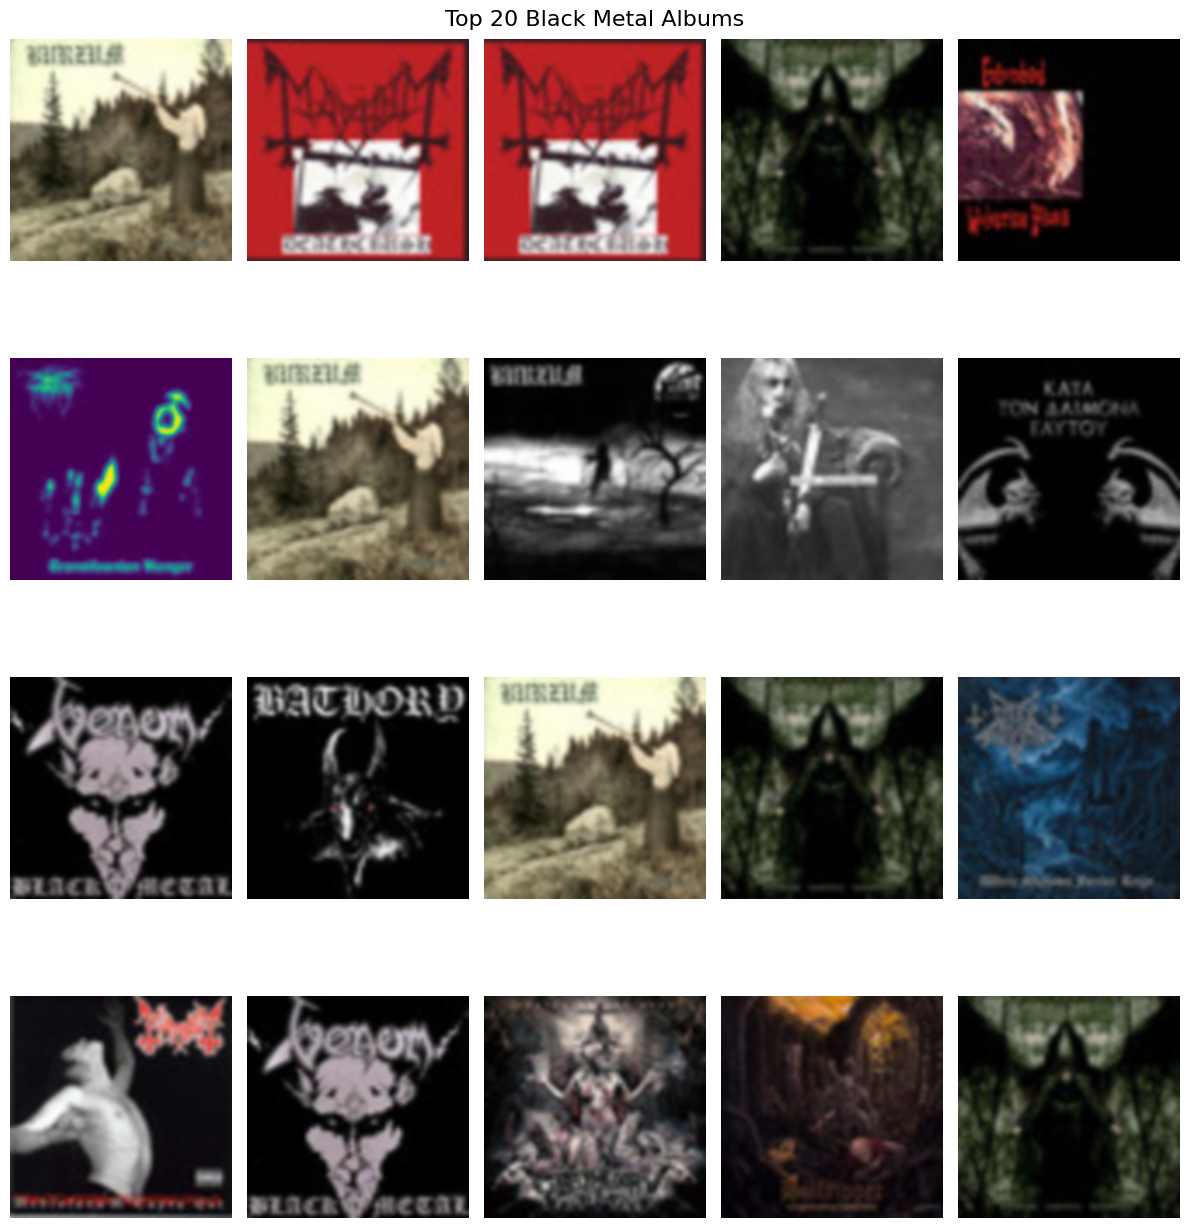

In [32]:
#Lastly, here we will set up the code for the image, the code should be the same at the one above except we are substituting top_albums for top_ahh
# Set up the grid for thumbnail images
num_rows = 4
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 14))

# Iterate over the top albums and plot the thumbnails
for i, (index, album) in enumerate(top_bmetal.iterrows()):
    row = i // num_cols
    col = i % num_cols
    img_url = album['Thumbnail']
    img_data = urllib.request.urlopen(img_url)
    img = Image.open(img_data)
    axes[row, col].imshow(np.array(img), interpolation='bicubic')  # Set interpolation to 'bicubic'
    axes[row, col].axis('off')
    
#Here we will set up the title, the tight layout of the image, and save the image into our figures album
plt.suptitle('Top 20 Black Metal Albums', fontsize = 16, y = 0.93)
plt.tight_layout()
plt.savefig('../figures/Top_20_BMetal.png')

---
Below we will look at the top classic rock albums.

In [33]:
#We will begin by filtering the songs with 'alternative hip hop' in the Genre column
filtered_songs = songs[songs['Genre'].str.contains('classic rock', case = False)]

In [34]:
#Here we will pick the top 20 from the filtered_songs dataframe.
top_crock = filtered_songs.nlargest(20, 'Popularity')

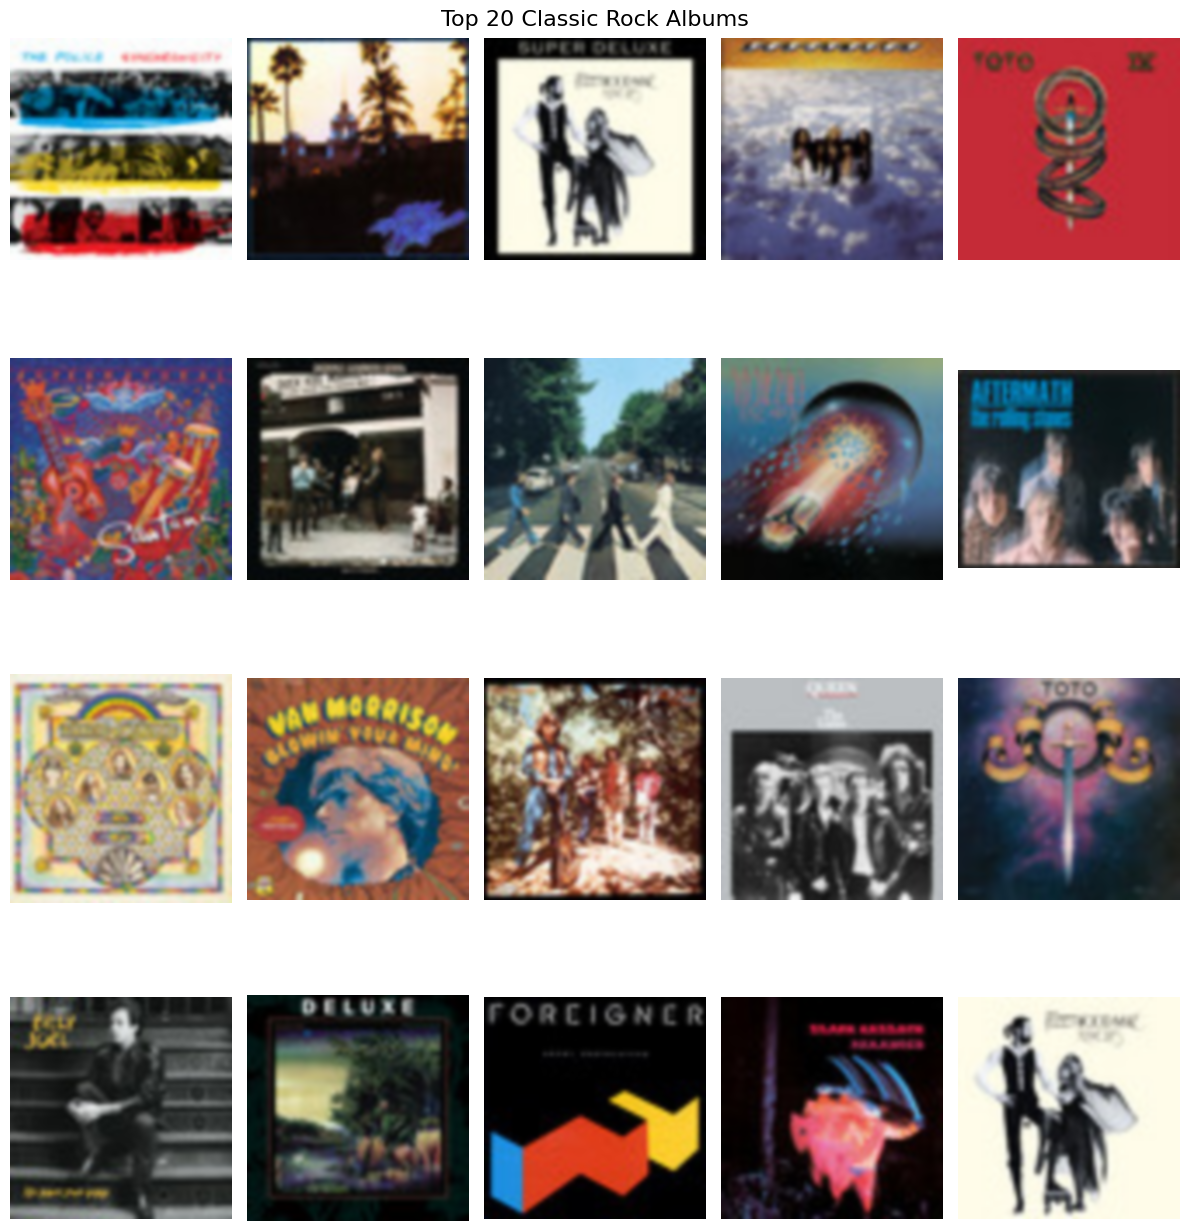

In [35]:
#Lastly, here we will set up the code for the image, the code should be the same at the one above except we are substituting top_albums for top_ahh
# Set up the grid for thumbnail images
num_rows = 4
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 14))

# Iterate over the top albums and plot the thumbnails
for i, (index, album) in enumerate(top_crock.iterrows()):
    row = i // num_cols
    col = i % num_cols
    img_url = album['Thumbnail']
    img_data = urllib.request.urlopen(img_url)
    img = Image.open(img_data)
    axes[row, col].imshow(np.array(img), interpolation='bicubic')  # Set interpolation to 'bicubic'
    axes[row, col].axis('off')
    
#Here we will set up the title, the tight layout of the image, and save the image into our figures album
plt.suptitle('Top 20 Classic Rock Albums', fontsize = 16, y = 0.93)
plt.tight_layout()
plt.savefig('../figures/Top_20_crock.png')

---
## Source
- [WordCloud Color Documentation](https://www.kaggle.com/code/niteshhalai/wordcloud-colormap)
- This gave me the idead of using [WordCloud](https://towardsdatascience.com/generate-meaningful-word-clouds-in-python-5b85f5668eeb) along with some of the uses and the code. I did add additional filtering in order to look at thinks like the genre since it is a string I used the str.contains function.
    - Additionally to the link above this [StackOverflow thread](https://stackoverflow.com/questions/28786534/increase-resolution-with-word-cloud-and-remove-empty-border) was of some help.
- [Matplotlib IMShow Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html), and here is a [tutorial](https://matplotlib.org/stable/tutorials/introductory/images.html) that was very helpful. This [video](https://youtu.be/1eYfoCtMmPY) also helped.
- This [video](https://www.youtube.com/watch?v=tooddaC14q4&t=6s&ab_channel=MadhavThaker) led me to the creators [github](https://github.com/madhavthaker/spotify-recommendation-system/blob/main/spotify-recommendation-engine.ipynb) which helped me put my idea into code.